# Building a CNN to classify images on the CIFAR dataset

https://www.cs.toronto.edu/~kriz/cifar.html|

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

## Building a CNN
We will check how different layers are configured then build our own model

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Deep learning framework
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
# For plotting
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Loading the data and splitting it to train and test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


[6]


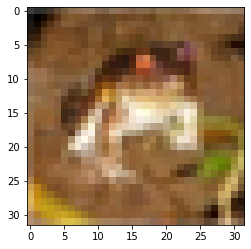

In [3]:
# Lets look at one of the images and its label
print(y_train[0])
plt.imshow(x_train[0])

In [4]:
classes = 10

y_train = keras.utils.to_categorical(y_train, classes)
y_test = keras.utils.to_categorical(y_test, classes)

In [5]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
# Making everything to be float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Conv2D

```python
keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```
When using this layer as the first layer in a model, provide the keyword argument input_shape

- `filters`: Integer, the number of output filters in the convolution.
- `kernel_size`: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `activation`: Activation function to use. If you don't specify anything, no activation is applied.


Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
```python
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
```

- `pool_size`: Integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal).
- `strides`: Integer, tuple of 2 integers, or None. Strides values.

### Flatten
```python
keras.layers.Flatten(data_format=None)
```
Turns its input into a one-dimensional vector (per instance). Usually used when transitioning between convolutional layers and fully connected layers.

### Activation
```python
keras.layers.Activation(activation)
```

Applies an activation function to the output

### Sequential
The Sequential model is a linear stack of layers. You can create a Sequential model by passing a list of layer instances to the constructor



In [8]:

model_1 = Sequential()


model_1.add(Conv2D(64, (4, 4), strides = (2,2), padding='same', input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (4, 4), strides = (2,2)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.3))
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3136      
_________________________________________________________________
activation_4 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          65600     
_________________________________________________________________
activation_5 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)              

In [9]:
opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-6)
model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_1.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 59s 1ms/step - loss: 1.7663 - accuracy: 0.3555 - val_loss: 1.6557 - val_accuracy: 0.4037
Epoch 2/10
50000/50000 [==============================] - 55s 1ms/step - loss: 1.4667 - accuracy: 0.4708 - val_loss: 1.4914 - val_accuracy: 0.4792
Epoch 3/10
50000/50000 [==============================] - 58s 1ms/step - loss: 1.3428 - accuracy: 0.5222 - val_loss: 1.3719 - val_accuracy: 0.5181
Epoch 4/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.2579 - accuracy: 0.5538 - val_loss: 1.2479 - val_accuracy: 0.5562
Epoch 5/10
50000/50000 [==============================] - 55s 1ms/step - loss: 1.1993 - accuracy: 0.5742 - val_loss: 1.2068 - val_accuracy: 0.5730
Epoch 6/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.1574 - accuracy: 0.5911 - val_loss: 1.1376 - val_accuracy: 0.5938
Epoch 7/10
50000/50000 [==============================] - 54s 1ms/s

In [10]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0544627782821656
Test accuracy: 0.625


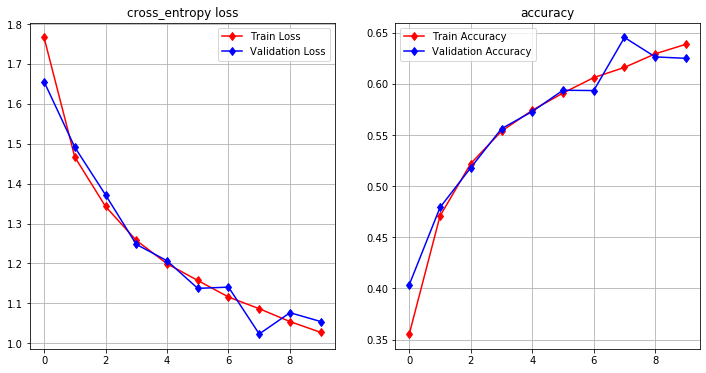

In [13]:
plot_loss_accuracy(model_1.history)

### Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> Flatten -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. Build a more complicated model with the following pattern:
- Conv -> Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> Flatten -> Dense -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

2. How many parameters does your model have